In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def pairs_trading(data):
    # data is a DataFrame with columns 'COCONUTS' and 'PINA_COLADAS'

    # calculate the spread between the two securities
    spread = data['COCONUTS'] - data['PINA_COLADAS']

    # compute the rolling mean and standard deviation of the spread
    spread_mean = spread.rolling(window=50).mean()
    spread_std = spread.rolling(window=50).std()

    # compute the z-score of the spread
    zscore = (spread - spread_mean) / spread_std

    # set up the trading signals
    long_signal = zscore < -1.0
    short_signal = zscore > 1.0
    exit_signal = abs(zscore) < 0.5

    # initialize positions and PnL
    positions = np.zeros(len(data))
    pnl = np.zeros(len(data))

    # iterate through the data and implement the trading strategy
    for i in range(len(data)):
        if long_signal[i]:
            positions[i] = 1
        elif short_signal[i]:
            positions[i] = -1
        elif exit_signal[i]:
            positions[i] = 0
        else:
            positions[i] = positions[i-1]

        if i > 0:
            pnl[i] = positions[i-1] * (spread[i] - spread[i-1])

    # compute the cumulative PnL
    cum_pnl = np.cumsum(pnl)

    # plot the results
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(cum_pnl)
    ax.set_title('Pairs Trading Strategy: COCONUTS and PINA_COLADAS')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative PnL')
    plt.show()

In [61]:
coconut_data = pd.read_csv('COCONUTS.csv')
pina_coladas_data = pd.read_csv('PINA_COLADAS.csv')

d = {'COCONUTS': coconut_data['mid_price'], 'PINA_COLADAS': pina_coladas_data['mid_price']}
df = pd.DataFrame(d)

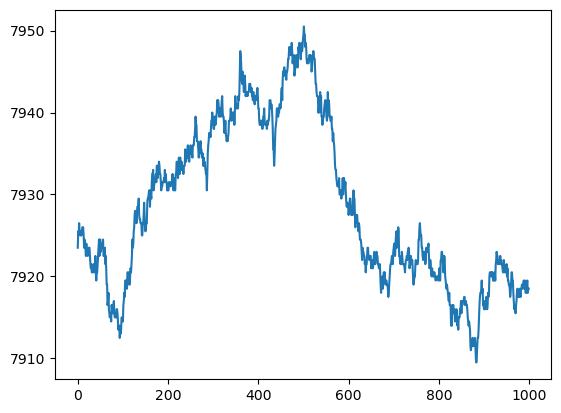

In [62]:
plt.plot(df['COCONUTS'])


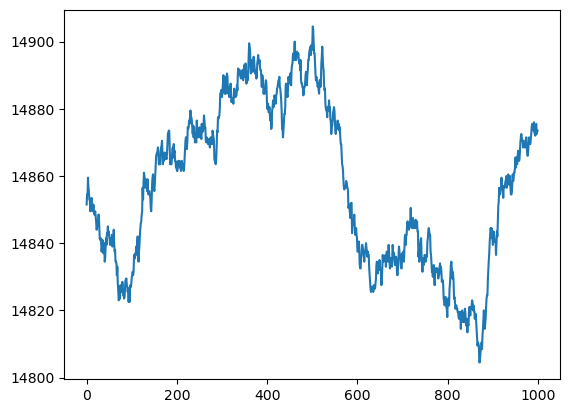

In [63]:
plt.plot(df['PINA_COLADAS'])

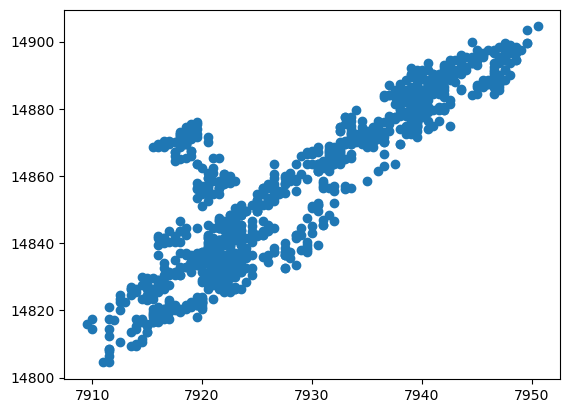

In [64]:
plt.scatter(df['COCONUTS'], df['PINA_COLADAS'])

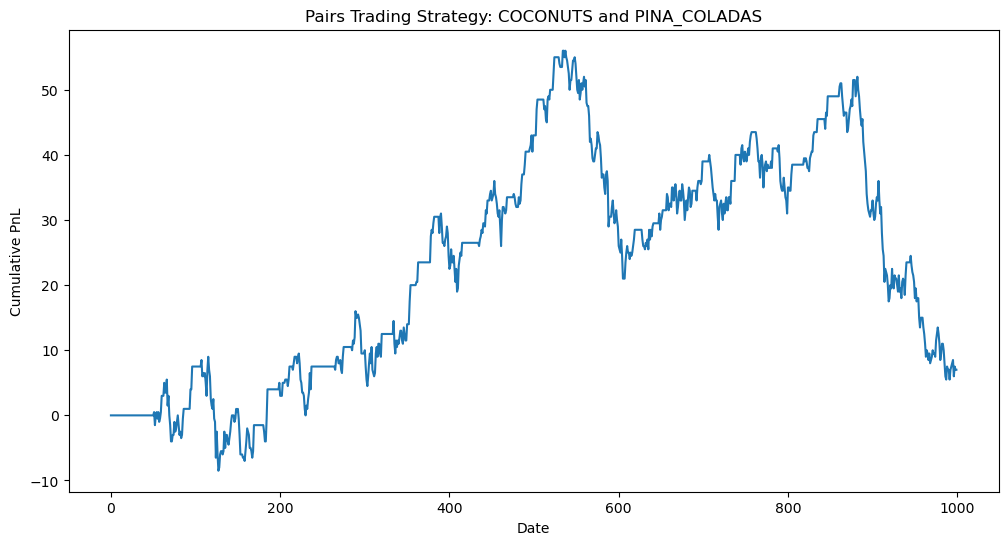

In [65]:
pairs_trading(df)